## Ch.12 문자열과 패턴 매칭

In [324]:
a <- "abc"
b <- '123'

In [325]:
as.numeric(a)

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"


[1] NA

In [326]:
as.numeric(b)

[1] 123

In [327]:
pets <- c("cat","dog","gerbil","terrapin")
length(pets) 

[1] 4

In [328]:
nchar(pets)

[1] 3 3 6 8

In [329]:
class(pets)

[1] "character"

In [330]:
is.factor(pets)

[1] FALSE

In [331]:
letters

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

In [332]:
LETTERS

[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S"
[20] "T" "U" "V" "W" "X" "Y" "Z"

In [1]:
which(letters == 'n')

[1] 14

### 문자열 연결

In [2]:
a <- 'abc'
b <- '123'

In [3]:
c(a, b)

[1] "abc" "123"

In [26]:
paste(a, b, sep = "")

[1] "abc123"

In [27]:
phrase <- 'the quick brown fox jumps over the lazy dog'
substr(phrase, 5, 15) # 5번째부터 15번째까지의 문자열 추출

[1] "quick brown"

In [28]:
nchar(phrase) # 문자열 개수

[1] 43

In [45]:
strsplit(phrase, split= NULL) # 한 글자씩 분리

[[1]]
 [1] "t" "h" "e" " " "q" "u" "i" "c" "k" " " "b" "r" "o" "w" "n" " " "f" "o" "x"
[20] " " "j" "u" "m" "p" "s" " " "o" "v" "e" "r" " " "t" "h" "e" " " "l" "a" "z"
[39] "y" " " "d" "o" "g"

In [33]:
strsplit(phrase, split= 'v') # `split = 'v'`는 v를 기준으로 문자열을 나누라는 의미이다.

[[1]]
[1] "the quick brown fox jumps o" "er the lazy dog"

In [43]:
table(strsplit(phrase, split = NULL)) # 문자열을 하나씩 분리하고 빈도 계싼


  a b c d e f g h i j k l m n o p q r s t u v w x y z 
8 1 1 1 1 3 1 1 2 1 1 1 1 1 1 4 1 1 2 1 2 2 1 1 1 1 1 

위 결과에서 공백 수는 8개이다.

In [44]:
strsplit(phrase, split =" ") # 공백으로 분리 

[[1]]
[1] "the"   "quick" "brown" "fox"   "jumps" "over"  "the"   "lazy"  "dog"

In [46]:
lapply(strsplit(phrase, split = NULL), rev)

[[1]]
 [1] "g" "o" "d" " " "y" "z" "a" "l" " " "e" "h" "t" " " "r" "e" "v" "o" " " "s"
[20] "p" "m" "u" "j" " " "x" "o" "f" " " "n" "w" "o" "r" "b" " " "k" "c" "i" "u"
[39] "q" " " "e" "h" "t"

In [50]:
sapply(lapply(strsplit(phrase, split = NULL), rev), paste, collapse ='') 

[1] "god yzal eht revo spmuj xof nworb kciuq eht"

In [51]:
strsplit(phrase, split = 'the')

[[1]]
[1] ""                             " quick brown fox jumps over "
[3] " lazy dog"

### match()함수

In [59]:
first <- c(5,8,3,5,3,6,4,4,2,8,8,8,4,4,6)
second <- c(8,6,4,2)

In [60]:
# 첫 번째 벡터의 각 원소는 두 번째 벡터의 어디에 있나? 발견되지 않으면 NA, 발견되면 위치를 생성한다
match(first, second)

[1] NA  1 NA NA NA  2  3  3  4  1  1  1  3  3  2

### 패턴매칭

In [61]:
df <- read.table("https://enook.jbnu.ac.kr/138/ch01/08/worldfloras.txt", header=TRUE)

In [64]:
head(df)

,Country,Latitude,Area,Population,Flora,Endemism,Continent
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,Afghanistan,30,636.0,14.300,3000,0.270,Asia
2,Albania,42,29.0,3.000,3200,0.008,Europe
3,Algeria,35,2382.0,21.300,3139,0.080,N.Africa
4,Andorra,42,0.5,0.034,1000,0.000,Europe
5,Angola,25,1247.0,8.500,5000,0.250,Africa
6,Antarctica,85,14000.0,0.000,2,0.000,Antarctica


In [65]:
df$Country

[1] "Afghanistan"              "Albania"                 
  [3] "Algeria"                  "Andorra"                 
  [5] "Angola"                   "Antarctica"              
  [7] "Argentina"                "Australia"               
  [9] "Austria"                  "Bahrain"                 
 [11] "Balearic Islands"         "Bangladesh"              
 [13] "Belgium"                  "Belize"                  
 [15] "Benin"                    "Bhutan"                  
 [17] "Bolivia"                  "Botswana"                
 [19] "Brazil"                   "Brunei"                  
 [21] "Bulgaria"                 "Burkina Faso"            
 [23] "Burma"                    "Burundi"                 
 [25] "Cameroon"                 "Canada"                  
 [27] "Central African Republic" "Chad"                    
 [29] "Chile"                    "China"                   
 [31] "Colombia"                 "Congo"                   
 [33] "Corsica"                  "Costa Rica"              
 [35] "Crete"                    "Cuba"                    
 [37] "Cyprus"                   "Czechoslovakia"          
 [39] "Denmark"                  "Dominican Republic"      
 [41] "Ecuador"                  "Egypt"                   
 [43] "El Salvador"              "Ethiopia"                
 [45] "Finland"                  "France"                  
 [47] "French Guiana"            "Gabon"                   
 [49] "Galapagos"                "Gambia"                  
 [51] "Germany East"             "Germany West"            
 [53] "Ghana"                    "Greece"                  
 [55] "Greenland"                "Guatemala"               
 [57] "Guinea"                   "Guyana"                  
 [59] "Haiti"                    "Hawaii"                  
 [61] "Honduras"                 "Hong Kong"               
 [63] "Hungary"                  "Iceland"                 
 [65] "India"                    "Indonesia"               
 [67] "Iran"                     "Iraq"                    
 [69] "Ireland"                  "Israel"                  
 [71] "Italy"                    "Ivory Coast"             
 [73] "Jamaica"                  "Japan"                   
 [75] "Jordan"                   "Kampuchea"               
 [77] "Kenya"                    "Korea"                   
 [79] "Kuwait"                   "Laos"                    
 [81] "Lebanon"                  "Lesotho"                 
 [83] "Liberia"                  "Libya"                   
 [85] "Liechtenstein"            "Luxembourg"              
 [87] "Madagascar"               "Malawi"                  
 [89] "Malaysia"                 "Mali"                    
 [91] "Malta"                    "Mauritania"              
 [93] "Mauritius"                "Mexico"                  
 [95] "Mongolia"                 "Morocco"                 
 [97] "Mozambique"               "Namibia"                 
 [99] "Nepal"                    "Netherlands"             
[101] "New Caledonia"            "New Zealand"             
[103] "Nicaragua"                "Niger"                   
[105] "Nigeria"                  "Norway"                  
[107] "Oman"                     "Pakistan"                
[109] "Panama"                   "Papua New Guinea"        
[111] "Paraguay"                 "Peru"                    
[113] "Philippines"              "Poland"                  
[115] "Portugal"                 "Puerto Rico"             
[117] "Qatar"                    "Reunion"                 
[119] "Romania"                  "Rwanda"                  
[121] "Sardinia"                 "Saudi Arabia"            
[123] "Senegal"                  "Seychelles"              
[125] "Sicily"                   "Sierra Leone"            
[127] "Singapore"                "Solomon Islands"         
[129] "Somalia"                  "South Africa"            
[131] "Spain"                    "Sri Lanka"               
[133] "St.Helena"                "Sudan"  

In [66]:
Country <- df$Country

`grep()` 함수는 문자열 벡터에서 패턴을 찾는 함수이다.

In [72]:
grep('R', Country) # 국가 명에 R이 있는 국가 찾기

[1]  27  34  40 116 118 119 120 152

In [69]:
Country[grep('R', Country)]

[1] "Central African Republic" "Costa Rica"              
[3] "Dominican Republic"       "Puerto Rico"             
[5] "Reunion"                  "Romania"                 
[7] "Rwanda"                   "USSR"

`^`는 맨 앞을 의미

In [71]:
Country[grep('^R', Country)] # 국가 명 맨 앞에 R이 있는 국가 찾기

[1] "Reunion" "Romania" "Rwanda"

In [73]:
Country[grep(' R', Country)] # R 앞에 공백이 있는 국가명

[1] "Central African Republic" "Costa Rica"              
[3] "Dominican Republic"       "Puerto Rico"

`$`는 맨 뒤를 의미

In [74]:
Country[grep('y$', Country)] # y로 끝나는 국가명

[1] "Hungary"  "Italy"    "Norway"   "Paraguay" "Sicily"   "Turkey"   "Uruguay"

In [76]:
Country[grep('[D-F]', Country)] # D, E, F 중 하나가 있는 국가명

[1] "Burkina Faso"       "Denmark"            "Dominican Republic"
 [4] "Ecuador"            "Egypt"              "El Salvador"       
 [7] "Ethiopia"           "Finland"            "France"            
[10] "French Guiana"      "Germany East"

In [77]:
Country[grep('^[D-F]', Country)] # D, E, F 중 하나로 시작하는 국가명

[1] "Denmark"            "Dominican Republic" "Ecuador"           
[4] "Egypt"              "El Salvador"        "Ethiopia"          
[7] "Finland"            "France"             "French Guiana"

In [78]:
Country[-grep('[a-u]$', Country)]

[1] "Hungary"  "Italy"    "Norway"   "Paraguay" "Sicily"   "Turkey"   "Uruguay" 
[8] "USA"      "USSR"

`.` 은 임의의 문자 하나

In [81]:
Country[grep('^.y', Country)] # 처음에 임의의 문자 하나 뒤 y

[1] "Cyprus" "Syria"

In [82]:
Country[grep('^..y', Country)] # 처음에 임의의 문자 두 개 뒤 y

[1] "Egypt"      "Guyana"     "Seychelles"

In [83]:
Country[grep('^.{5}y', Country)] # 처음에 임의의 문자 다섯 개 뒤 y

[1] "Norway" "Sicily" "Turkey"

In [85]:
Country[grep('^.{1,4}$', Country)] # 처음에 임의의 문자 1개 이상 4개 이하로 끝나는 국가명

[1] "Chad" "Cuba" "Iran" "Iraq" "Laos" "Mali" "Oman" "Peru" "Togo" "USA" 
[11] "USSR"

In [86]:
Country[grep('^.{15,}$', Country)] # 임의의 문자 15개 이상

[1] "Balearic Islands"         "Central African Republic"
[3] "Dominican Republic"       "Papua New Guinea"        
[5] "Solomon Islands"          "Trinidad & Tobago"       
[7] "Tristan da Cunha"

### 텍스트 치환 함수 sub(), gsup()

In [87]:
text <- c("arm", "leg", "head", "foot", "hand", "hindleg", "elbow")

In [94]:
sub('o', 'O', text) # 각 원소에서 첫 o는 O로 치환

[1] "arm"     "leg"     "head"    "fOot"    "hand"    "hindleg" "elbOw"

In [95]:
gsub('o', 'O', text) # 각 원소에 모든 o는 O로 치환

[1] "arm"     "leg"     "head"    "fOOt"    "hand"    "hindleg" "elbOw"

In [99]:
gsub('^.', 'O', text) # 각 원소에서 첫 문자는 O로 치환

[1] "Orm"     "Oeg"     "Oead"    "Ooot"    "Oand"    "Oindleg" "Olbow"

### 패턴이 나타나는 위치

In [100]:
regexpr('o', text) # 각 원소에서 o가 있는 위치, 없는 -1 반환

[1] -1 -1 -1  2 -1 -1  4
attr(,"match.length")
[1] -1 -1 -1  1 -1 -1  1
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

In [108]:
grep('o', text) # o가 있는 원소의 인덱스

[1] 4 7

In [109]:
text[grep('o', text)] # o가 있는 원소

[1] "foot"  "elbow"

In [110]:
gregexpr('o', c('foot', 'elbow')) # 각 원소에서 o가 있는 모든 위치

[[1]]
[1] 2 3
attr(,"match.length")
[1] 1 1
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[[2]]
[1] 4
attr(,"match.length")
[1] 1
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

In [114]:
freq <- unlist (lapply(gregexpr('o', text), length)) # 각 원소에 o가 몇 개 있는가?

In [112]:
freq

[1] 1 1 1 2 1 1 1

In [115]:
present <- ifelse(regexpr('o', text) < 0, 0, 1) # o의 존재 여부

In [116]:
freq * present

[1] 0 0 0 2 0 0 1

## Ch.13 함수 작성

### 복잡한 함수 예제

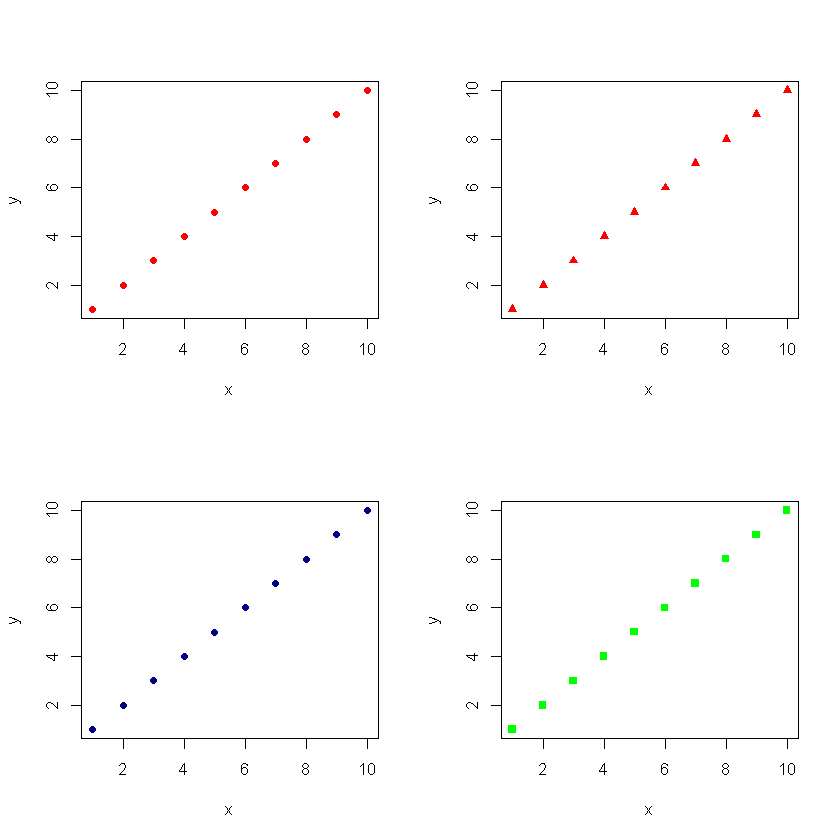

In [121]:
# 함수를 호출할 때 pc 값이 없으면 16, co 값이 없으면 red

charplot <- function(x, y, pc=16, co='red') plot(y~x, pch=pc, col = co)

par(mfrow=c(2,2)) # 패널에 2x2 그래프, 그래프 4개

charplot(1:10, 1:10) # pc와 co 기본 값 사용
charplot(1:10, 1:10, 17) # pc 값은 17
charplot(1:10, 1:10, co = 'navy') # pc는 기본 값
charplot(1:10, 1:10, 15, 'green') # pc는 15 co는 green

par(mfrow=c(1,1)) # 패널에 그래프 하나로 되돌아감

### 함수 값 반환

In [123]:
parmax <- function (a,b) {
  c <- pmax(a,b)    # pmax() 함수는 a와 b의 각 원소 쌍의 최댓값을 구한다
  median(c)     # 중앙값 반환
}

In [124]:
x <- c(1,9,2,8,3,7)
y <- c(9,2,8,3,7,2)

In [127]:
pmax(x,y) # 두 벡터의 상응하는 원소들 중 큰 값

[1] 9 9 8 8 7 7

In [126]:
parmax(x,y)

[1] 8

함수에서 두 개 이상의 객체를 반환할 때는 이들을 리스트 객체 하나로 만들어 반환해야 한다.

In [128]:
parboth <- function(a, b){
    c <- pmax(a, b)
    d <- pmin(a, b)
    
    answer <- list(median(c), median(d)) # 리스트 하나로 만든다
    
    names(answer)[[1]] <- "median of the parallel maxima"
    names(answer)[[2]] <- "median of the parallel minima"
    
    return(answer)
}


In [129]:
parboth(x,y)

$`median of the parallel maxima`
[1] 8

$`median of the parallel minima`
[1] 2

## Ch 14. 데이터프레임

In [2]:
getwd()

[1] "C:/Users/woo/Desktop/Project/class_2022CA"

In [5]:
worms = read.csv('data/worms.csv')
head(worms)

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
1,Nashs.Field,3.6,11,Grassland,4.1,FALSE,4
2,Silwood.Bottom,5.1,2,Arable,5.2,FALSE,7
3,Nursery.Field,2.8,3,Grassland,4.3,FALSE,2
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
6,Oak.Mead,3.1,2,Grassland,3.9,FALSE,2


In [6]:
str(worms)

'data.frame':	20 obs. of  7 variables:
 $ Field.Name  : chr  "Nashs.Field" "Silwood.Bottom" "Nursery.Field" "Rush.Meadow" ...
 $ Area        : num  3.6 5.1 2.8 2.4 3.8 3.1 3.5 2.1 1.9 1.5 ...
 $ Slope       : int  11 2 3 5 0 2 3 0 0 4 ...
 $ Vegetation  : chr  "Grassland" "Arable" "Grassland" "Meadow" ...
 $ Soil.pH     : num  4.1 5.2 4.3 4.9 4.2 3.9 4.2 4.8 5.7 5 ...
 $ Damp        : logi  FALSE FALSE FALSE TRUE FALSE FALSE ...
 $ Worm.density: int  4 7 2 5 6 2 3 4 9 7 ...


In [7]:
summary(worms)

  Field.Name             Area           Slope        Vegetation       
 Length:20          Min.   :0.800   Min.   : 0.00   Length:20         
 Class :character   1st Qu.:2.175   1st Qu.: 0.75   Class :character  
 Mode  :character   Median :3.000   Median : 2.00   Mode  :character  
                    Mean   :2.990   Mean   : 3.50                     
                    3rd Qu.:3.725   3rd Qu.: 5.25                     
                    Max.   :5.100   Max.   :11.00                     
    Soil.pH         Damp          Worm.density 
 Min.   :3.500   Mode :logical   Min.   :0.00  
 1st Qu.:4.100   FALSE:14        1st Qu.:2.00  
 Median :4.600   TRUE :6         Median :4.00  
 Mean   :4.555                   Mean   :4.35  
 3rd Qu.:5.000                   3rd Qu.:6.25  
 Max.   :5.700                   Max.   :9.00  

In [15]:
is.na(worms) %>% sum

[1] 0

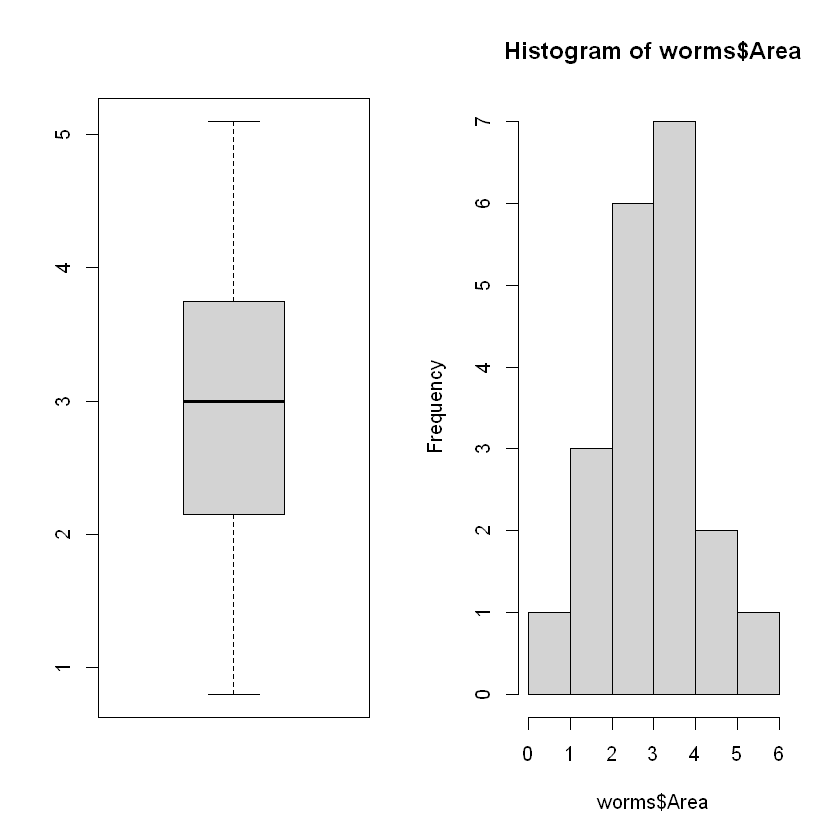

In [17]:
par(mfrow = c(1,2))

boxplot(worms$Area)
hist(worms$Area)

par(mfrow = c(1,2))

### 웹 사이트에서 데이터 읽기

In [18]:
baseurl <- "http://www.bio.ic.ac.uk/research/mjcraw/therbook/data/"

In [20]:
filename = 'worms.txt'

In [26]:
fileurl = paste(baseurl, filename, sep='')

In [5]:
worms = read.table(fileurl, header = TRUE)

In [6]:
head(worms)

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
1,Nashs.Field,3.6,11,Grassland,4.1,FALSE,4
2,Silwood.Bottom,5.1,2,Arable,5.2,FALSE,7
3,Nursery.Field,2.8,3,Grassland,4.3,FALSE,2
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
6,Oak.Mead,3.1,2,Grassland,3.9,FALSE,2


In [7]:
worms[3,5]

[1] 4.3

In [8]:
worms[14:19, 7]

[1] 0 6 8 4 5 1

In [9]:
worms[1:5, 2:3]

,Area,Slope
,<dbl>,<int>
1,3.6,11
2,5.1,2
3,2.8,3
4,2.4,5
5,3.8,0


In [12]:
worms[c(1,3,5), c(2,4,6)]

,Area,Vegetation,Damp
,<dbl>,<chr>,<lgl>
1,3.6,Grassland,FALSE
3,2.8,Grassland,FALSE
5,3.8,Scrub,FALSE


In [13]:
worms[3, ]

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
3,Nursery.Field,2.8,3,Grassland,4.3,FALSE,2


In [11]:
worms[, 3]

[1] 11  2  3  5  0  2  3  0  0  4 10  1  2  6  0  0  8  2  1 10

In [15]:
class(worms[3,])

[1] "data.frame"

In [16]:
class(worms[, 3])

[1] "integer"

In [33]:
worms[, c(1,5)]

Field.Name,Soil.pH
<chr>,<dbl>
Nashs.Field,4.1
Silwood.Bottom,5.2
Nursery.Field,4.3
Rush.Meadow,4.9
Gunness.Thicket,4.2
Oak.Mead,3.9
Church.Field,4.2
Ashurst,4.8
The.Orchard,5.7


In [34]:
worms$Vegetation

[1] "Grassland" "Arable"    "Grassland" "Meadow"    "Scrub"     "Grassland"
 [7] "Grassland" "Arable"    "Orchard"   "Grassland" "Scrub"     "Grassland"
[13] "Grassland" "Grassland" "Meadow"    "Meadow"    "Scrub"     "Arable"   
[19] "Grassland" "Scrub"

In [26]:
aggregate(worms, list(worms$Vegetation), mean)

Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"
Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"
Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"
Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"
Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"
Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"
Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"
Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"
Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"
Warning message in mean.default(X[[i]], ...):
"인자가 수치형 또는 논리형이 아니므로 NA를 반환합니다"


Group.1,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arable,NA,3.866667,1.333333,NA,4.833333,0.0000000,5.333333
Grassland,NA,2.911111,3.666667,NA,4.100000,0.1111111,2.444444
Meadow,NA,3.466667,1.666667,NA,4.933333,1.0000000,6.333333
Orchard,NA,1.900000,0.000000,NA,5.700000,0.0000000,9.000000
Scrub,NA,2.425000,7.000000,NA,4.800000,0.5000000,5.250000


In [43]:
worms$Slope

[1] 11  2  3  5  0  2  3  0  0  4 10  1  2  6  0  0  8  2  1 10

In [44]:
order(worms$Slope)

[1]  5  8  9 15 16 12 19  2  6 13 18  3  7 10  4 14 17 11 20  1

In [50]:
worms[order(worms$Slope), ] %>% head()

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
8,Ashurst,2.1,0,Arable,4.8,FALSE,4
9,The.Orchard,1.9,0,Orchard,5.7,FALSE,9
15,Pond.Field,4.1,0,Meadow,5.0,TRUE,6
16,Water.Meadow,3.9,0,Meadow,4.9,TRUE,8
12,North.Gravel,3.3,1,Grassland,4.1,FALSE,1


In [52]:
worms[rev(order(worms$Slope)), ] %>% head()

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
1,Nashs.Field,3.6,11,Grassland,4.1,FALSE,4
20,Farm.Wood,0.8,10,Scrub,5.1,TRUE,3
11,Garden.Wood,2.9,10,Scrub,5.2,FALSE,8
17,Cheapside,2.2,8,Scrub,4.7,TRUE,4
14,Observatory.Ridge,1.8,6,Grassland,3.8,FALSE,0
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5


In [55]:
# Vegetation 오름차순 정렬 후 Worm, density 오름차순 정렬

worms[order(worms$Vegetation, worms$Worm.density), ] %>% head

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
8,Ashurst,2.1,0,Arable,4.8,FALSE,4
18,Pound.Hill,4.4,2,Arable,4.5,FALSE,5
2,Silwood.Bottom,5.1,2,Arable,5.2,FALSE,7
14,Observatory.Ridge,1.8,6,Grassland,3.8,FALSE,0
12,North.Gravel,3.3,1,Grassland,4.1,FALSE,1
19,Gravel.Pit,2.9,1,Grassland,3.5,FALSE,1


In [56]:
df <- worms[order(worms$Vegetation, worms$Worm.density), c(4,7,5,3)]

In [58]:
df %>% head

,Vegetation,Worm.density,Soil.pH,Slope
,<chr>,<int>,<dbl>,<int>
8,Arable,4,4.8,0
18,Arable,5,4.5,2
2,Arable,7,5.2,2
14,Grassland,0,3.8,6
12,Grassland,1,4.1,1
19,Grassland,1,3.5,1


### 데이터프레임에서 일부 행 추출

In [28]:
worms[worms$Damp == TRUE, ]

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
10,Rookery.Slope,1.5,4,Grassland,5.0,TRUE,7
15,Pond.Field,4.1,0,Meadow,5.0,TRUE,6
16,Water.Meadow,3.9,0,Meadow,4.9,TRUE,8
17,Cheapside,2.2,8,Scrub,4.7,TRUE,4
20,Farm.Wood,0.8,10,Scrub,5.1,TRUE,3


In [32]:
# Worm.density 변수의 중앙값보다 크고 Soil.pH가 5.2보다 작은 데이터만 추출

worms[(worms$Worm.density > median(worms$Worm.density)) & (worms$Soil.pH < 5.2), ]

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
10,Rookery.Slope,1.5,4,Grassland,5.0,TRUE,7
15,Pond.Field,4.1,0,Meadow,5.0,TRUE,6
16,Water.Meadow,3.9,0,Meadow,4.9,TRUE,8
18,Pound.Hill,4.4,2,Arable,4.5,FALSE,5


In [36]:
worms[, sapply(worms, is.numeric)] %>% head

,Area,Slope,Soil.pH,Worm.density
,<dbl>,<int>,<dbl>,<int>
1,3.6,11,4.1,4
2,5.1,2,5.2,7
3,2.8,3,4.3,2
4,2.4,5,4.9,5
5,3.8,0,4.2,6
6,3.1,2,3.9,2


In [38]:
worms[-(6:15), ]

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
1,Nashs.Field,3.6,11,Grassland,4.1,FALSE,4
2,Silwood.Bottom,5.1,2,Arable,5.2,FALSE,7
3,Nursery.Field,2.8,3,Grassland,4.3,FALSE,2
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
16,Water.Meadow,3.9,0,Meadow,4.9,TRUE,8
17,Cheapside,2.2,8,Scrub,4.7,TRUE,4
18,Pound.Hill,4.4,2,Arable,4.5,FALSE,5
19,Gravel.Pit,2.9,1,Grassland,3.5,FALSE,1


In [42]:
worms[ worms$Vegetation != 'Grassland', ] %>% head

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
2,Silwood.Bottom,5.1,2,Arable,5.2,FALSE,7
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
8,Ashurst,2.1,0,Arable,4.8,FALSE,4
9,The.Orchard,1.9,0,Orchard,5.7,FALSE,9
11,Garden.Wood,2.9,10,Scrub,5.2,FALSE,8


In [43]:
worms[ !worms$Vegetation == 'Grassland', ] %>% head

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
2,Silwood.Bottom,5.1,2,Arable,5.2,FALSE,7
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
8,Ashurst,2.1,0,Arable,4.8,FALSE,4
9,The.Orchard,1.9,0,Orchard,5.7,FALSE,9
11,Garden.Wood,2.9,10,Scrub,5.2,FALSE,8


In [47]:
worms[ -(worms$Vegetation == 'Grassland'), ] %>% head # 다르다

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
2,Silwood.Bottom,5.1,2,Arable,5.2,FALSE,7
3,Nursery.Field,2.8,3,Grassland,4.3,FALSE,2
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
6,Oak.Mead,3.1,2,Grassland,3.9,FALSE,2
7,Church.Field,3.5,3,Grassland,4.2,FALSE,3


In [49]:
worms[-(worms$Damp == FALSE), ] %>% head

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
2,Silwood.Bottom,5.1,2,Arable,5.2,FALSE,7
3,Nursery.Field,2.8,3,Grassland,4.3,FALSE,2
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
6,Oak.Mead,3.1,2,Grassland,3.9,FALSE,2
7,Church.Field,3.5,3,Grassland,4.2,FALSE,3


In [50]:
worms[-which(worms$Damp == FALSE), ]
worms[!(worms$Damp == FALSE), ]
worms[worms$Damp == TRUE, ]

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
10,Rookery.Slope,1.5,4,Grassland,5.0,TRUE,7
15,Pond.Field,4.1,0,Meadow,5.0,TRUE,6
16,Water.Meadow,3.9,0,Meadow,4.9,TRUE,8
17,Cheapside,2.2,8,Scrub,4.7,TRUE,4
20,Farm.Wood,0.8,10,Scrub,5.1,TRUE,3


,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
10,Rookery.Slope,1.5,4,Grassland,5.0,TRUE,7
15,Pond.Field,4.1,0,Meadow,5.0,TRUE,6
16,Water.Meadow,3.9,0,Meadow,4.9,TRUE,8
17,Cheapside,2.2,8,Scrub,4.7,TRUE,4
20,Farm.Wood,0.8,10,Scrub,5.1,TRUE,3


,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
10,Rookery.Slope,1.5,4,Grassland,5.0,TRUE,7
15,Pond.Field,4.1,0,Meadow,5.0,TRUE,6
16,Water.Meadow,3.9,0,Meadow,4.9,TRUE,8
17,Cheapside,2.2,8,Scrub,4.7,TRUE,4
20,Farm.Wood,0.8,10,Scrub,5.1,TRUE,3


### 결측값을 가진 행 처리

In [58]:
baseurl <- "http://www.bio.ic.ac.uk/research/mjcraw/therbook/data/"
filename <- "worms.missing.txt"
fileurl <- paste(baseurl, filename, sep="")
fileurl

[1] "http://www.bio.ic.ac.uk/research/mjcraw/therbook/data/worms.missing.txt"

In [60]:
df <- read.table(fileurl, header=TRUE)
df

Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
Nashs.Field,3.6,11,Grassland,4.1,FALSE,4
Silwood.Bottom,5.1,NA,Arable,5.2,FALSE,7
Nursery.Field,2.8,3,Grassland,4.3,FALSE,2
Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
Oak.Mead,3.1,2,Grassland,3.9,FALSE,2
Church.Field,3.5,3,Grassland,NA,NA,NA
Ashurst,2.1,0,Arable,4.8,FALSE,4
The.Orchard,1.9,0,Orchard,5.7,FALSE,9


In [61]:
na.omit(df)

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
1,Nashs.Field,3.6,11,Grassland,4.1,FALSE,4
3,Nursery.Field,2.8,3,Grassland,4.3,FALSE,2
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
6,Oak.Mead,3.1,2,Grassland,3.9,FALSE,2
8,Ashurst,2.1,0,Arable,4.8,FALSE,4
9,The.Orchard,1.9,0,Orchard,5.7,FALSE,9
10,Rookery.Slope,1.5,4,Grassland,5.0,TRUE,7
11,Garden.Wood,2.9,10,Scrub,5.2,FALSE,8


In [98]:
df %>% is.na %>% rowSums %>% as.logical %>% which

[1]  2  7 19

In [95]:
na.exclude(df) %>% head

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
1,Nashs.Field,3.6,11,Grassland,4.1,FALSE,4
3,Nursery.Field,2.8,3,Grassland,4.3,FALSE,2
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
6,Oak.Mead,3.1,2,Grassland,3.9,FALSE,2
8,Ashurst,2.1,0,Arable,4.8,FALSE,4


In [97]:
df[complete.cases(df),] %>% head

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
1,Nashs.Field,3.6,11,Grassland,4.1,FALSE,4
3,Nursery.Field,2.8,3,Grassland,4.3,FALSE,2
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
6,Oak.Mead,3.1,2,Grassland,3.9,FALSE,2
8,Ashurst,2.1,0,Arable,4.8,FALSE,4


In [103]:
apply(apply(df, 2, is.na), 2, sum)

Field.Name         Area        Slope   Vegetation      Soil.pH         Damp 
           0            1            1            0            1            1 
Worm.density 
           1

In [107]:
df[is.na(df)] <- 0

In [110]:
df 

Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Nashs.Field,3.6,11,Grassland,4.1,0,4
Silwood.Bottom,5.1,0,Arable,5.2,0,7
Nursery.Field,2.8,3,Grassland,4.3,0,2
Rush.Meadow,2.4,5,Meadow,4.9,1,5
Gunness.Thicket,3.8,0,Scrub,4.2,0,6
Oak.Mead,3.1,2,Grassland,3.9,0,2
Church.Field,3.5,3,Grassland,0.0,0,0
Ashurst,2.1,0,Arable,4.8,0,4
The.Orchard,1.9,0,Orchard,5.7,0,9


In [111]:
worms[,grep('^S', names(worms))]

Slope,Soil.pH
<int>,<dbl>
11,4.1
2,5.2
3,4.3
5,4.9
0,4.2
2,3.9
3,4.2
0,4.8
0,5.7


### 다른 객체로부터 데이터프레임 생성

In [113]:
x <- runif(10)

In [114]:
y <- letters[1:10]

In [115]:
z <- sample(c(rep(TRUE, 5), rep(FALSE, 5)))

In [118]:
new <- data.frame(y,z,x)

In [119]:
new

y,z,x
<chr>,<lgl>,<dbl>
a,FALSE,0.4431860
b,TRUE,0.8119763
c,FALSE,0.2819624
d,TRUE,0.8831443
e,FALSE,0.0770863
f,TRUE,0.8983308
g,FALSE,0.2800678
h,TRUE,0.7854635
i,TRUE,0.9377389


In [120]:
set.seed(1)

In [128]:
y <- rpois(1500, 1.5)
y

[1] 0 3 0 1 0 1 2 2 0 2 0 2 4 3 3 1 2 1 1 1 1 3 2 4 0 3 1 3 2 4 4 1 2 0 3 0 1
  [38] 2 0 1 1 0 0 3 3 1 3 1 1 2 0 0 3 1 1 3 1 4 3 2 1 2 3 0 0 3 2 3 3 1 0 2 2 3
  [75] 1 5 2 0 0 3 1 3 3 3 2 2 2 1 1 2 0 2 1 0 0 0 0 1 3 0 0 0 0 3 3 0 1 1 1 0 1
 [112] 2 1 2 3 3 2 1 0 3 2 1 2 0 2 3 0 4 1 2 4 1 2 0 0 1 0 0 2 0 1 2 3 1 2 1 1 1
 [149] 2 3 2 0 0 1 5 2 0 2 1 1 1 1 4 1 3 4 1 1 2 1 3 3 5 0 2 2 0 3 0 0 4 2 0 3 6
 [186] 3 1 4 1 4 2 2 3 0 2 1 0 2 2 0 2 2 2 0 0 0 0 2 1 1 0 0 0 1 0 3 1 0 1 1 2 1
 [223] 3 6 0 1 1 4 2 2 3 0 1 2 0 2 2 1 1 0 4 5 2 1 1 0 1 3 1 1 2 2 2 0 3 0 2 1 1
 [260] 2 0 1 2 1 1 2 2 2 3 1 4 1 0 1 4 0 0 0 2 0 2 1 1 1 3 0 1 0 2 3 1 2 0 2 3 1
 [297] 0 0 1 1 0 1 2 1 2 1 0 4 2 1 0 1 2 0 2 0 2 5 0 2 1 3 1 2 0 2 2 1 4 2 1 3 1
 [334] 3 2 1 1 1 4 0 2 3 5 4 2 0 0 1 2 0 0 0 0 3 1 3 3 4 2 2 2 0 3 2 1 1 0 1 2 2
 [371] 5 1 1 2 0 1 1 1 0 2 1 3 2 1 2 1 2 0 0 1 2 1 3 0 5 2 1 0 2 1 3 0 1 3 2 1 2
 [408] 3 1 1 2 1 3 0 2 0 1 4 0 0 0 5 1 2 0 1 5 2 0 3 0 1 3 1 0 4 2 0 1 1 2 2 3 0
 [445] 0 0 1 3 0 1 0 0 2 1 2 1 4 1 1 0 2 0 1 2 1 2 2 1 2 5 1 3 0 1 1 1 2 0 2 3 1
 [482] 2 1 1 2 1 3 1 1 3 1 0 0 3 1 2 0 1 1 1 3 4 3 1 0 0 2 0 1 1 0 2 2 2 0 1 0 0
 [519] 3 1 1 3 1 0 0 2 0 0 2 1 1 0 1 2 0 1 0 2 4 0 1 0 2 0 2 0 2 1 2 3 0 2 0 1 2
 [556] 2 0 0 2 1 1 2 1 6 0 2 1 1 3 0 2 3 1 3 2 0 4 1 1 0 2 1 2 1 0 3 0 2 4 1 3 2
 [593] 2 0 2 0 2 3 2 2 1 2 2 0 0 5 5 1 2 2 1 1 3 3 1 0 4 3 1 3 0 0 3 0 3 2 0 0 0
 [630] 2 0 2 1 2 0 1 0 4 2 1 2 0 0 1 1 0 2 0 4 2 0 1 0 0 0 1 2 1 1 1 2 4 1 1 2 2
 [667] 2 1 1 0 1 0 3 2 1 1 2 2 2 2 4 2 2 0 1 3 1 0 1 0 0 3 4 3 3 0 0 2 2 0 2 4 0
 [704] 1 3 1 1 1 2 0 2 2 0 1 0 2 1 0 2 1 1 2 2 0 2 0 2 1 0 2 2 0 0 0 1 2 1 0 0 3
 [741] 1 0 1 1 1 0 1 1 3 2 0 2 1 0 0 0 1 0 1 3 4 1 0 0 0 1 0 2 2 4 3 2 0 0 1 5 3
 [778] 1 1 3 2 3 2 0 0 4 3 1 2 0 1 1 0 1 1 1 2 1 1 3 0 3 1 2 2 1 0 3 1 2 0 1 1 1
 [815] 1 1 1 1 1 2 1 3 2 2 1 0 1 2 0 3 0 0 2 0 1 2 0 1 1 2 1 1 1 4 2 3 4 2 3 2 3
 [852] 3 1 3 2 0 0 4 1 0 5 0 1 1 1 2 1 2 2 2 5 1 2 1 1 2 4 4 0 1 3 2 1 2 0 3 3 0
 [889] 0 1 1 2 1 1 1 2 0 1 1 0 0 0 4 2 0 1 0 2 2 0 3 3 1 2 1 1 2 2 3 2 0 2 3 2 2
 [926] 2 1 1 3 1 3 2 3 1 1 3 2 1 2 3 1 1 4 1 2 2 1 3 2 0 2 2 1 3 1 1 5 2 1 1 1 1
 [963] 2 1 2 1 1 3 0 1 2 1 1 0 2 1 1 0 0 1 1 1 5 0 0 2 0 2 0 2 1 1 3 0 1 4 1 3 0
[1000] 1 1 0 3 1 5 1 3 0 0 1 1 1 2 4 1 0 2 5 0 3 1 1 0 1 0 2 1 3 1 3 1 2 2 0 1 3
[1037] 0 3 4 1 3 0 2 1 4 2 0 1 4 0 3 0 2 2 2 2 1 2 1 1 0 1 2 0 5 3 5 0 2 1 1 1 2
[1074] 1 3 5 3 5 2 1 3 2 1 2 2 2 3 2 8 1 1 0 1 1 2 2 1 1 2 2 2 0 3 2 0 2 0 1 4 0
[1111] 2 3 0 1 0 0 1 1 2 1 1 0 3 0 2 0 2 1 1 1 1 3 1 1 3 0 0 1 3 3 1 0 2 1 1 4 0
[1148] 0 2 0 1 1 3 0 0 2 0 0 0 1 1 0 0 1 1 3 1 2 1 4 2 3 0 1 2 1 1 2 1 2 0 1 1 0
[1185] 1 2 2 0 3 0 3 1 0 1 0 3 1 1 0 3 0 2 2 2 1 1 2 3 0 1 1 1 0 2 0 2 2 4 0 1 0
[1222] 2 0 1 0 4 0 2 4 2 1 2 0 0 0 1 1 2 1 0 2 3 1 0 2 0 2 0 3 1 2 3 3 0 1 1 3 1
[1259] 1 0 1 1 0 1 1 3 1 2 2 0 1 0 1 1 0 0 4 0 1 2 0 1 1 2 1 2 2 1 1 1 1 4 0 1 2
[1296] 2 1 3 2 1 4 2 2 0 1 4 0 0 1 0 0 1 2 4 0 0 0 1 1 0 3 0 1 1 1 2 2 4 1 1 1 2
[1333] 1 0 3 1 3 4 3 2 3 1 2 1 4 1 4 2 3 2 1 3 0 0 2 1 1 1 2 1 1 1 3 1 5 2 3 1 2
[1370] 0 1 3 5 1 1 1 3 1 4 0 2 2 0 2 1 0 2 2 0 1 0 2 3 1 0 2 2 3 1 4 1 0 1 1 1 0
[1407] 2 2 1 2 1 1 2 0 3 5 2 1 3 2 1 0 2 3 2 3 1 1 0 1 4 2 0 1 3 1 1 0 0 2 0 6 0
[1444] 2 0 0 0 2 3 2 1 2 4 1 1 2 0 1 1 0 1 2 1 2 1 3 1 0 2 0 2 0 2 2 1 3 0 1 2 1
[1481] 2 0 1 2 1 0 3 1 3 2 1 1 1 2 4 1 0 1 0 1

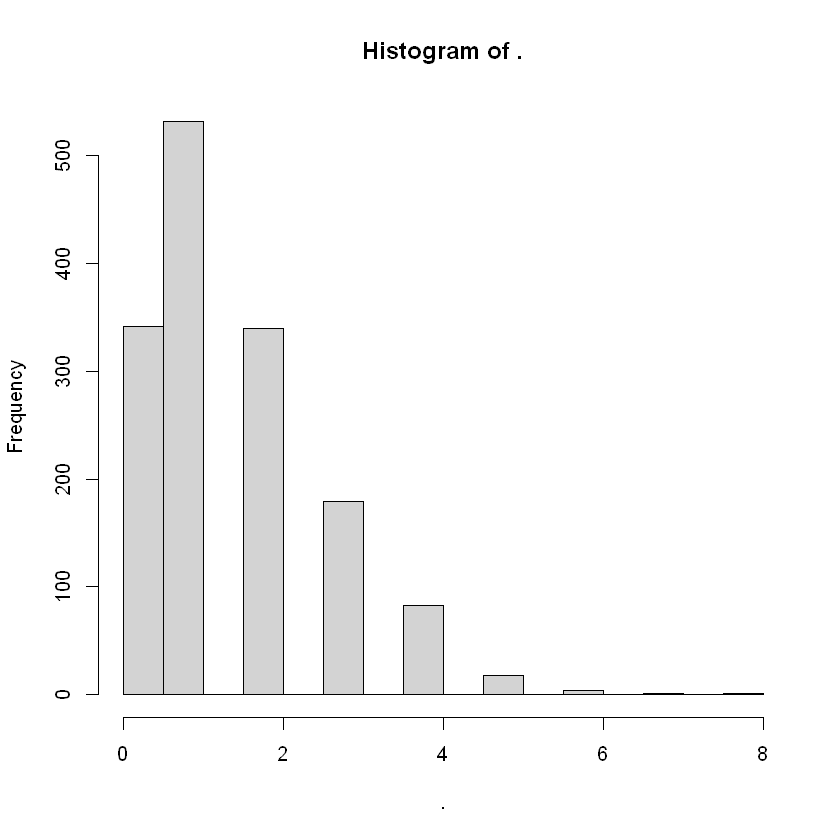

In [124]:
y %>% hist

In [125]:
table(y)

y
  0   1   2   3   4   5   6   7   8 
342 532 340 179  83  18   4   1   1 

In [127]:
short <- as.data.frame(table(y))
short

y,Freq
<fct>,<int>
0,342
1,532
2,340
3,179
4,83
5,18
6,4
7,1
8,1


In [130]:
index <- rep(1:9, short$Freq)

In [131]:
index

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [408] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [445] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [482] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [519] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [556] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [593] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [630] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [667] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [704] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [741] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [778] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [815] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [852] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [889] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [926] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [963] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1000] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1037] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1074] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1111] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1148] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1185] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
[1222] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1259] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1296] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1333] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1370] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5
[1407] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[1444] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6
[1481] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 8 9

In [133]:
length(index)

[1] 1500

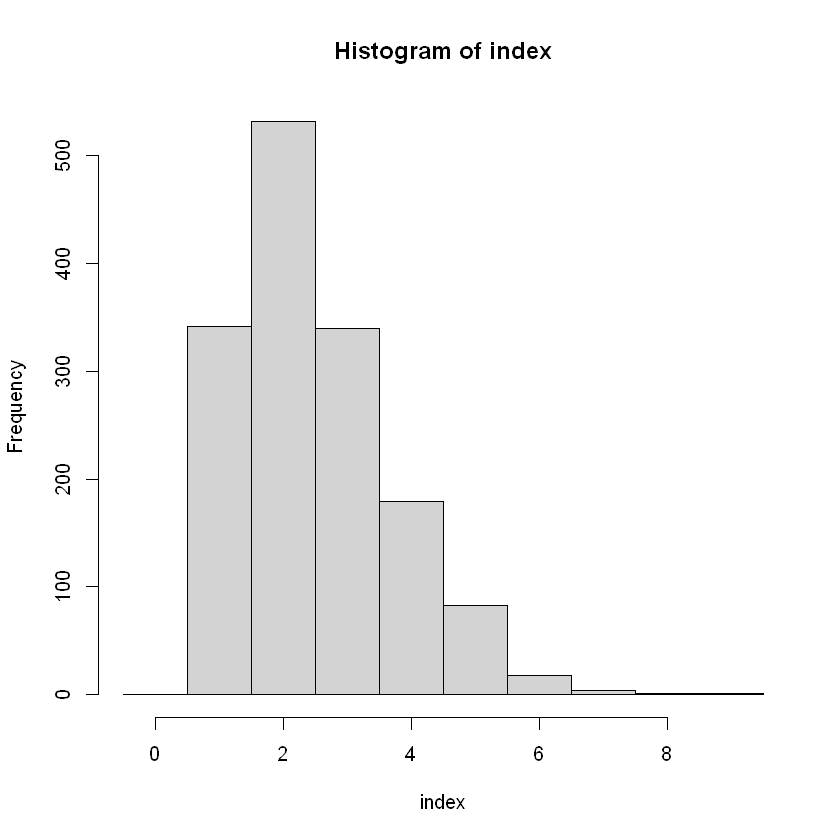

In [134]:
hist(index, -0.5:9.5)

In [135]:
long <- short[index,]
tail(long)

,y,Freq
,<fct>,<int>
7,6,4
7.1,6,4
7.2,6,4
7.3,6,4
8,7,1
9,8,1


In [140]:
long[2,]

,y,Freq
,<fct>,<int>
1.1,0,342


In [141]:
long2 <- as.data.frame(lapply(short,
                              function(x) rep(x, short$Freq)))

In [143]:
long2 %>% tail

,y,Freq
,<fct>,<int>
1495,6,4
1496,6,4
1497,6,4
1498,6,4
1499,7,1
1500,8,1


In [144]:
long2 %>% head

,y,Freq
,<fct>,<int>
1,0,342
2,0,342
3,0,342
4,0,342
5,0,342
6,0,342


In [159]:
lapply(short,  function(x) rep(x, short$Freq))

$y
   [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [445] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [519] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [630] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [667] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [704] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [852] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [889] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [926] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [963] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1000] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1037] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1074] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1111] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1148] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1185] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
[1222] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1259] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1296] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1333] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1370] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
[1407] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1444] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5
[1481] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 7 8
Levels: 0 1 2 3 4 5 6 7 8

$Freq
   [1] 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342
  [19] 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342
  [37] 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342
  [55] 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342
  [73] 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342
  [91] 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342
 [109] 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342
 [127] 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342 342
 [145] 342 342 342 342 342 342 342 342 342 34

### 데이터프레임에서 중복된 행 제거

In [160]:
baseurl <- "http://www.bio.ic.ac.uk/research/mjcraw/therbook/data/"
filename <- "dups.txt"
(fileurl <- paste(baseurl, filename, sep=""))

[1] "http://www.bio.ic.ac.uk/research/mjcraw/therbook/data/dups.txt"

In [163]:
df <- read.table(fileurl, header = TRUE)

In [164]:
df

cow,dog,cat,bat
<int>,<int>,<int>,<int>
1,2,3,1
1,2,2,1
3,2,1,1
4,4,2,1
3,2,1,1
6,1,2,5
1,2,3,2


In [165]:
unique(df)

,cow,dog,cat,bat
,<int>,<int>,<int>,<int>
1,1,2,3,1
2,1,2,2,1
3,3,2,1,1
4,4,4,2,1
6,6,1,2,5
7,1,2,3,2


### 데이터프레임 통합

In [166]:
url1 <- "http://www.bio.ic.ac.uk/research/mjcraw/therbook/data/lifeforms.txt"
df1 <- read.table(url1, header=TRUE)
df1 %>% head

,Genus,species,lifeform
,<chr>,<chr>,<chr>
1,Acer,platanoides,tree
2,Acer,palmatum,tree
3,Ajuga,reptans,herb
4,Conyza,sumatrensis,annual
5,Lamium,album,herb


In [167]:
url2 <- "http://www.bio.ic.ac.uk/research/mjcraw/therbook/data/fltimes.txt"
df2 <- read.table(url2, header=TRUE)
df2 %>% head

,Genus,species,flowering
,<chr>,<chr>,<chr>
1,Acer,platanoides,May
2,Ajuga,reptans,June
3,Brassica,napus,April
4,Chamerion,angustifolium,July
5,Conyza,bilbaoana,August
6,Lamium,album,January


In [168]:
merge(df1, df2)

Genus,species,lifeform,flowering
<chr>,<chr>,<chr>,<chr>
Acer,platanoides,tree,May
Ajuga,reptans,herb,June
Lamium,album,herb,January


In [170]:
both <- merge(df1, df2, all=T)
both

Genus,species,lifeform,flowering
<chr>,<chr>,<chr>,<chr>
Acer,palmatum,tree,NA
Acer,platanoides,tree,May
Ajuga,reptans,herb,June
Brassica,napus,NA,April
Chamerion,angustifolium,NA,July
Conyza,bilbaoana,NA,August
Conyza,sumatrensis,annual,NA
Lamium,album,herb,January


In [171]:
url3 <- "http://www.bio.ic.ac.uk/research/mjcraw/therbook/data/seedwts.txt"
(df3 <- read.table(url3, header=TRUE))

name1,name2,seed
<chr>,<chr>,<dbl>
Acer,platanoides,32.0
Lamium,album,12.0
Ajuga,reptans,4.0
Chamerion,angustifolium,1.5
Conyza,bilbaoana,0.5
Brassica,napus,7.0
Acer,palmatum,21.0
Conyza,sumatrensis,0.6


In [172]:
merge(both, df3, by.x=c('Genus', 'species'), by.y=c('name1', 'name2'))

Genus,species,lifeform,flowering,seed
<chr>,<chr>,<chr>,<chr>,<dbl>
Acer,palmatum,tree,NA,21.0
Acer,platanoides,tree,May,32.0
Ajuga,reptans,herb,June,4.0
Brassica,napus,NA,April,7.0
Chamerion,angustifolium,NA,July,1.5
Conyza,bilbaoana,NA,August,0.5
Conyza,sumatrensis,annual,NA,0.6
Lamium,album,herb,January,12.0


### 데이터프레임에 행 또는 열 추가

In [173]:
url <- "http://www.bio.ic.ac.uk/research/mjcraw/therbook/data/sales.txt"

In [175]:
(sales <- read.table(url, header=TRUE))

name,spring,summer,autumn,winter
<chr>,<int>,<int>,<int>,<int>
Jane.Smith,14,18,11,12
Robert.Jones,17,18,10,13
Dick.Rogers,12,16,9,14
William.Edwards,15,14,11,10
Janet.Jones,11,17,11,16


In [180]:
people_mean = rowMeans(sales[, 2:5])
people_mean

[1] 13.75 14.50 12.75 12.50 13.75

In [181]:
mean(people_mean)

[1] 13.45

In [182]:
mean(unlist(sales[ , 2:5]))

[1] 13.45

In [195]:
diff_mean <- people_mean - mean(people_mean)

In [196]:
diff_mean

[1]  0.30  1.05 -0.70 -0.95  0.30

In [197]:
new_sales <- cbind(sales, diff_mean)
new_sales

name,spring,summer,autumn,winter,diff_mean
<chr>,<int>,<int>,<int>,<int>,<dbl>
Jane.Smith,14,18,11,12,0.30
Robert.Jones,17,18,10,13,1.05
Dick.Rogers,12,16,9,14,-0.70
William.Edwards,15,14,11,10,-0.95
Janet.Jones,11,17,11,16,0.30


In [198]:
seasons_mean <- colMeans(sales[, 2:5])

In [199]:
seasons_mean

spring summer autumn winter 
  13.8   16.6   10.4   13.0

In [200]:
(seasons <- seasons_mean - mean(seasons_mean))

spring summer autumn winter 
  0.35   3.15  -3.05  -0.45

In [210]:
seasons 

spring summer autumn winter 
  0.35   3.15  -3.05  -0.45

In [203]:
new_row <- new_sales[1,]

In [205]:
new_row[1] <- 'seasonal effects'

In [206]:
new_row

,name,spring,summer,autumn,winter,diff_mean
,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,seasonal effects,14,18,11,12,0.3


In [207]:
new_row[2:5] <- seasons

In [211]:
new_row[6] <- 0
new_row

,name,spring,summer,autumn,winter,diff_mean
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,seasonal effects,0.35,3.15,-3.05,-0.45,0


In [212]:
new_frame <- rbind(new_sales, new_row)

In [213]:
new_frame

name,spring,summer,autumn,winter,diff_mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jane.Smith,14.00,18.00,11.00,12.00,0.30
Robert.Jones,17.00,18.00,10.00,13.00,1.05
Dick.Rogers,12.00,16.00,9.00,14.00,-0.70
William.Edwards,15.00,14.00,11.00,10.00,-0.95
Janet.Jones,11.00,17.00,11.00,16.00,0.30
seasonal effects,0.35,3.15,-3.05,-0.45,0.00


In [214]:
gm <- mean(unlist(new_frame[1:5, 2:5]))
gm

[1] 13.45

In [217]:
gm <- rep(gm, 4)

In [216]:
gm

[1] 13.45 13.45 13.45 13.45 13.45

In [243]:
new_grame[1:5, 2:5] = sweep(new_frame[1:5, 2:5], 2, gm, '-')

Warning message in sweep(new_frame[1:5, 2:5], 2, gm, "-"):
"STATS is longer than the extent of 'dim(x)[MARGIN]'"


In [244]:
new_frame[6,6] <- gm[1]

In [245]:
new_frame

name,spring,summer,autumn,winter,diff_mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jane.Smith,0.55,4.55,-2.45,-1.45,0.30
Robert.Jones,3.55,4.55,-3.45,-0.45,1.05
Dick.Rogers,-1.45,2.55,-4.45,0.55,-0.70
William.Edwards,1.55,0.55,-2.45,-3.45,-0.95
Janet.Jones,-2.45,3.55,-2.45,2.55,0.30
seasonal effects,0.35,3.15,-3.05,-0.45,13.45


In [237]:
new_frame[1:5, 2:5] <- sweep(new_frame[1:5, 2:5], 2, gm, "-")

Warning message in sweep(new_frame[1:5, 2:5], 2, gm, "-"):
"STATS is longer than the extent of 'dim(x)[MARGIN]'"


### 데이터프레임 요약

In [247]:
url <- "http://www.bio.ic.ac.uk/research/mjcraw/therbook/data/worms.txt"
(worms <- read.table(url, header=TRUE)) %>% head

,Field.Name,Area,Slope,Vegetation,Soil.pH,Damp,Worm.density
,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<int>
1,Nashs.Field,3.6,11,Grassland,4.1,FALSE,4
2,Silwood.Bottom,5.1,2,Arable,5.2,FALSE,7
3,Nursery.Field,2.8,3,Grassland,4.3,FALSE,2
4,Rush.Meadow,2.4,5,Meadow,4.9,TRUE,5
5,Gunness.Thicket,3.8,0,Scrub,4.2,FALSE,6
6,Oak.Mead,3.1,2,Grassland,3.9,FALSE,2


In [249]:
aggregate(worms[, c(2,3,5,7)], by = list(veg=worms$Vegetation), mean)

veg,Area,Slope,Soil.pH,Worm.density
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Arable,3.866667,1.333333,4.833333,5.333333
Grassland,2.911111,3.666667,4.100000,2.444444
Meadow,3.466667,1.666667,4.933333,6.333333
Orchard,1.900000,0.000000,5.700000,9.000000
Scrub,2.425000,7.000000,4.800000,5.250000


In [253]:
aggregate(worms[, c(2,3,5,7)], by = list(veg=worms$Vegetation, d=worms$Damp), mean)

veg,d,Area,Slope,Soil.pH,Worm.density
<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
Arable,FALSE,3.866667,1.333333,4.833333,5.333333
Grassland,FALSE,3.087500,3.625000,3.987500,1.875000
Orchard,FALSE,1.900000,0.000000,5.700000,9.000000
Scrub,FALSE,3.350000,5.000000,4.700000,7.000000
Grassland,TRUE,1.500000,4.000000,5.000000,7.000000
Meadow,TRUE,3.466667,1.666667,4.933333,6.333333
Scrub,TRUE,1.500000,9.000000,4.900000,3.500000


## Ch.15 그래픽

In [11]:
gg = c('a', 'a', 'a', 'b', 'b', 'c', 'c')
ss = 1:7

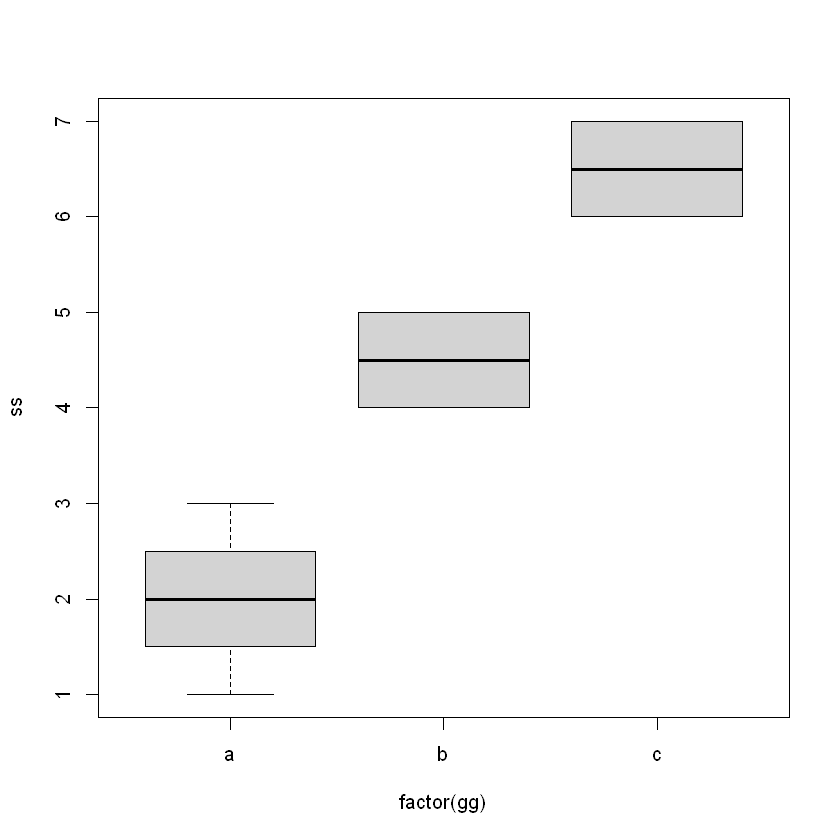

In [14]:
plot(ss ~ factor(gg))

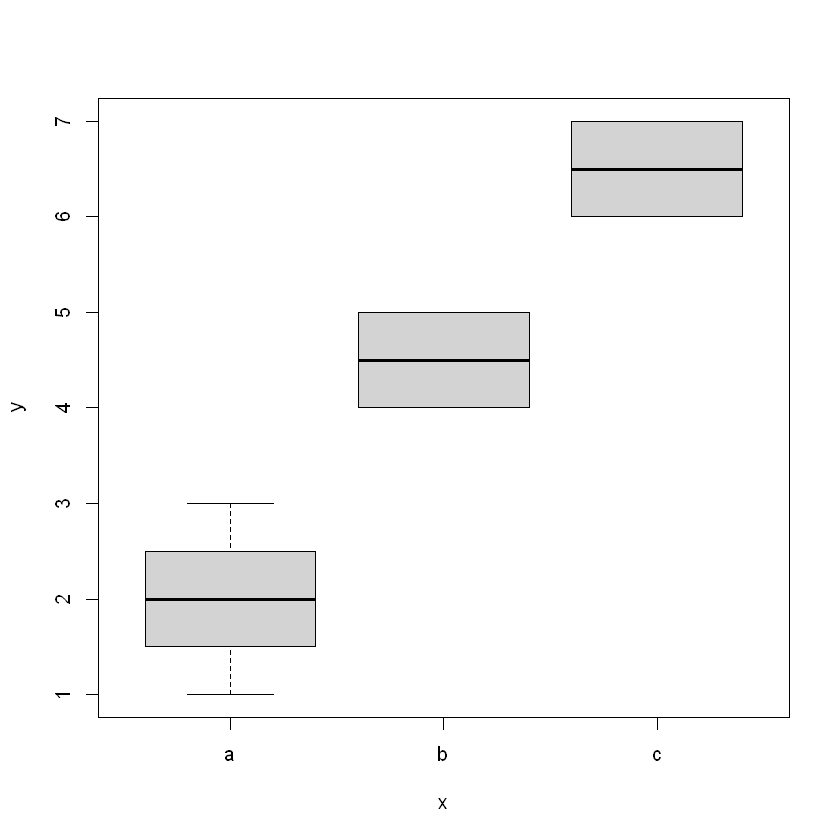

In [16]:
plot(factor(gg), ss)

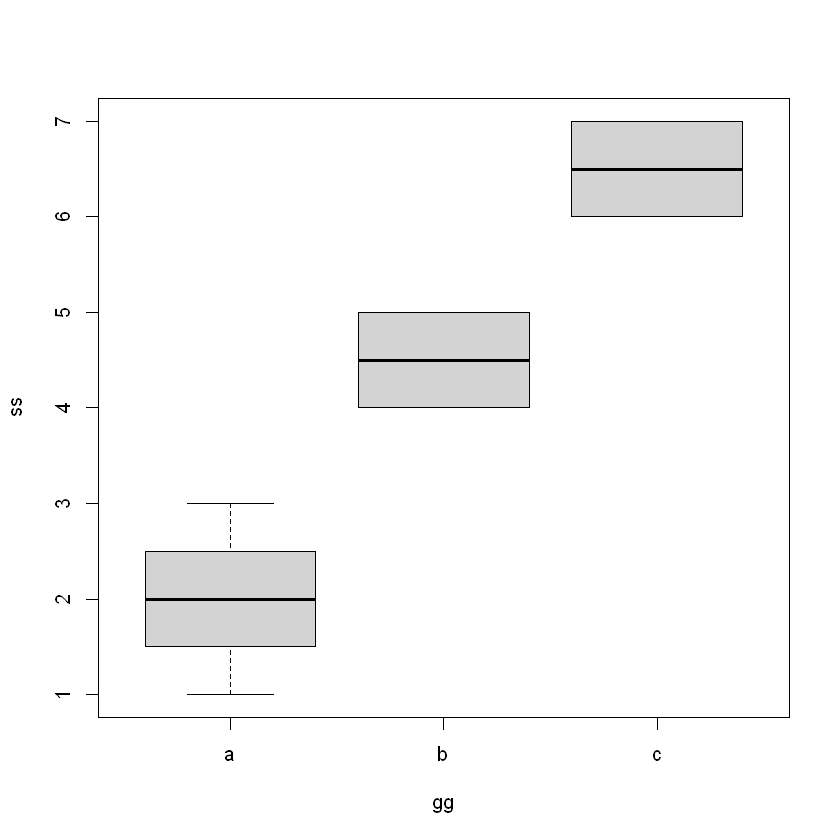

In [24]:
boxplot(ss ~ gg)

In [18]:
?barplot

barplot {graphics},R Documentation
height,"either a vector or matrix of values describing the bars which make up the plot. If height is a vector, the plot consists of a sequence of rectangular bars with heights given by the values in the vector. If height is a matrix and beside is FALSE then each bar of the plot corresponds to a column of height, with the values in the column giving the heights of stacked sub-bars making up the bar. If height is a matrix and beside is TRUE, then the values in each column are juxtaposed rather than stacked."
width,optional vector of bar widths. Re-cycled to length the number of bars drawn. Specifying a single value will have no visible effect unless xlim is specified.
space,"the amount of space (as a fraction of the average bar width) left before each bar. May be given as a single number or one number per bar. If height is a matrix and beside is TRUE, space may be specified by two numbers, where the first is the space between bars in the same group, and the second the space between the groups. If not given explicitly, it defaults to c(0,1) if height is a matrix and beside is TRUE, and to 0.2 otherwise."
names.arg,"a vector of names to be plotted below each bar or group of bars. If this argument is omitted, then the names are taken from the names attribute of height if this is a vector, or the column names if it is a matrix."
legend.text,"a vector of text used to construct a legend for the plot, or a logical indicating whether a legend should be included. This is only useful when height is a matrix. In that case given legend labels should correspond to the rows of height; if legend.text is true, the row names of height will be used as labels if they are non-null."
beside,"a logical value. If FALSE, the columns of height are portrayed as stacked bars, and if TRUE the columns are portrayed as juxtaposed bars."
horiz,"a logical value. If FALSE, the bars are drawn vertically with the first bar to the left. If TRUE, the bars are drawn horizontally with the first at the bottom."
density,"a vector giving the density of shading lines, in lines per inch, for the bars or bar components. The default value of NULL means that no shading lines are drawn. Non-positive values of density also inhibit the drawing of shading lines."
angle,"the slope of shading lines, given as an angle in degrees (counter-clockwise), for the bars or bar components."
col,"a vector of colors for the bars or bar components. By default, grey is used if height is a vector, and a gamma-corrected grey palette if height is a matrix."
